In [2]:
import numpy as np
import h5py as h5
import seaborn as sns
import pandas as pd
import nengo
import nengo_spa as spa

/home/flo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/flo/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [30]:
hf = h5.File('/media/flo/LACIE_HD/structured_vocabs/traffic_participants_vocab_check.h5', 'r')

In [31]:
vocab = spa.Vocabulary(dimensions=300)

In [32]:
classes= ['BICYCLE', 'CAR', 'MOTORCYCLE' ,'PERSON', 'TRUCK']
list(hf.keys())

['classes_manual1', 'vocab_vectors_manual1']

In [33]:
for i in np.arange(5):
    vocab.add(key=classes[i], p=np.array(hf['vocab_vectors_manual1'][i]))

In [34]:
sims = np.zeros((5,5))
for i in np.arange(5):
    for j in np.arange(5):
        sims[i,j] = vocab[classes[i]].compare(vocab[classes[j]])

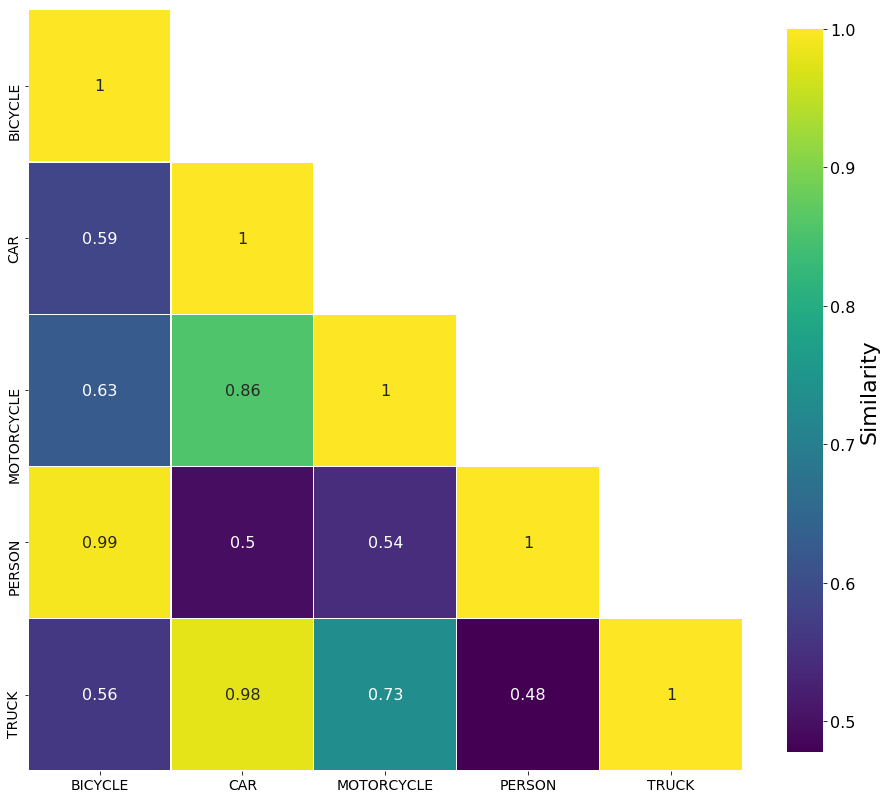

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
mask = np.zeros_like(sims)
mask[np.triu_indices_from(mask, k=1)] = True
fig = plt.figure(figsize=(16,14))
ax = sns.heatmap(sims, mask=mask, annot=True, annot_kws={"size": 16}, 
                 cmap=cm.viridis, linewidths=0.2, 
                 cbar_kws={"label": "Similarity", "shrink":0.95})
ax.figure.axes[-1].yaxis.label.set_size(22)
ax.set_xticklabels(classes, fontsize=14)
ax.set_yticklabels(classes, fontsize=14)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)

In [37]:
hf = h5.File('/media/flo/LACIE_HD/structured_vocabs/rdarius_original/traffic_participants_vocab.h5', 'r')
vocab = spa.Vocabulary(dimensions=300)
for i in np.arange(5):
    vocab.add(key=classes[i], p=np.array(hf['vocab_vectors_word2vec'][i]))

In [38]:
sims = np.zeros((5,5))
for i in np.arange(5):
    for j in np.arange(5):
        sims[i,j] = vocab[classes[i]].compare(vocab[classes[j]])

[Text(0, 0.5, 'BICYCLE'),
 Text(0, 1.5, 'CAR'),
 Text(0, 2.5, 'MOTORCYCLE'),
 Text(0, 3.5, 'PERSON'),
 Text(0, 4.5, 'TRUCK')]

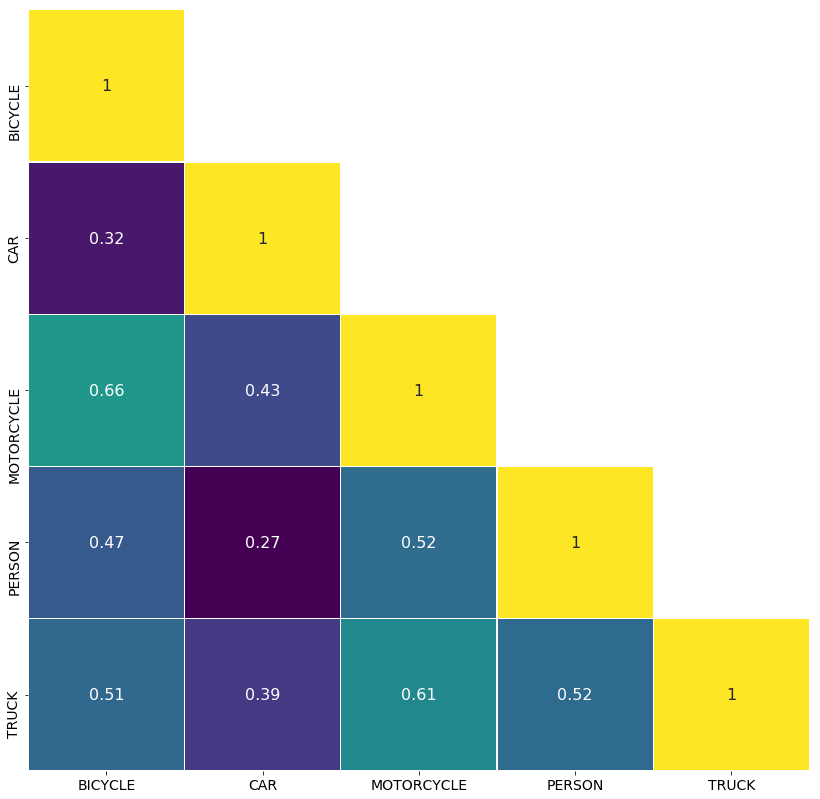

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
mask = np.zeros_like(sims)
mask[np.triu_indices_from(mask, k=1)] = True
fig = plt.figure(figsize=(14,14))
ax = sns.heatmap(sims, mask=mask, annot=True, annot_kws={"size": 16}, 
                 cmap=cm.viridis, linewidths=0.2, 
                 cbar=False)
#                  cbar_kws={"label": "Similarity", "shrink":0.95})
ax.figure.axes[-1].yaxis.label.set_size(22)
ax.set_xticklabels(classes, fontsize=14)
ax.set_yticklabels(classes, fontsize=14)
# cax = plt.gcf().axes[-1]
# cax.tick_params(labelsize=16)

In [27]:
def linear_vector(s, D):
    l_vector=np.zeros(D)
    l_vector[0]=np.cos(s*np.pi/2)
    l_vector[1]=np.sin(s*np.pi/2)
    return l_vector

In [28]:
linear_vector(0.1, 5)

array([0.98768834, 0.15643447, 0.        , 0.        , 0.        ])

In [29]:
linear_vector(0.025, 5)

array([0.99922904, 0.03925982, 0.        , 0.        , 0.        ])